##Import Libraries and Data##

In [3]:
# importing libraries
import pandas as pd
import numpy as np
# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
# preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
# models libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# evaluations libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score,auc,f1_score,precision_score, recall_score
from sklearn.model_selection import KFold, RandomizedSearchCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing the data 
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

##Exploratory Data Analysis##

#Data Reading#

In [5]:
# analysing the first 5 rows 
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# number of rows and column in the dataframe
data.shape

(7043, 21)

In [7]:
# information about datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# statistical summary of dataset
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# information of dataset in object type
data.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [10]:
# converting object to float data
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
# checking for null values
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# changes after filling null values
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].mean())
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# statistic data for specific columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


##Data Visualization##

**Churn Frequency**

Text(0.5, 1.0, '% of Churning')

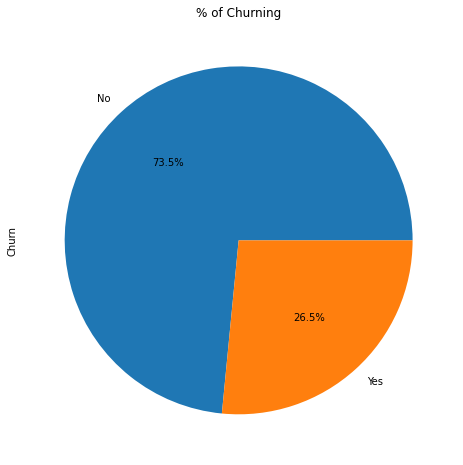

In [14]:
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Churning")

We have imbalanced data.

26.5% of customers switched to another company.

**Gender and Churn Distributions**

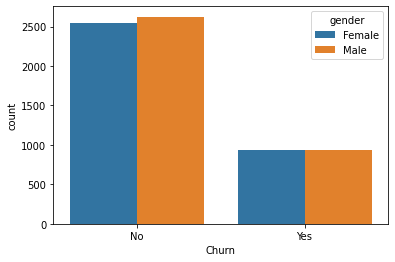

In [15]:
sns.countplot("Churn", data=data,hue="gender")

In [16]:
print(f'A female customer has a probability of {round(data[(data["gender"] == "Female") & (data["Churn"] == "Yes")].count()[0] / data[(data["gender"] == "Female")].count()[0] *100,2)} % churn')

print(f'A male customer has a probability of {round(data[(data["gender"] == "Male") & (data["Churn"] == "Yes")].count()[0] / data[(data["gender"] == "Male")].count()[0]*100,2)} % churn')

A female customer has a probability of 26.92 % churn
A male customer has a probability of 26.16 % churn


There is negligible difference in customer percentage who changed the service provider. Both genders behaved in similar way when it comes to migrating to another service provider.

**Customer Contract Distribution w.r.t Churn**

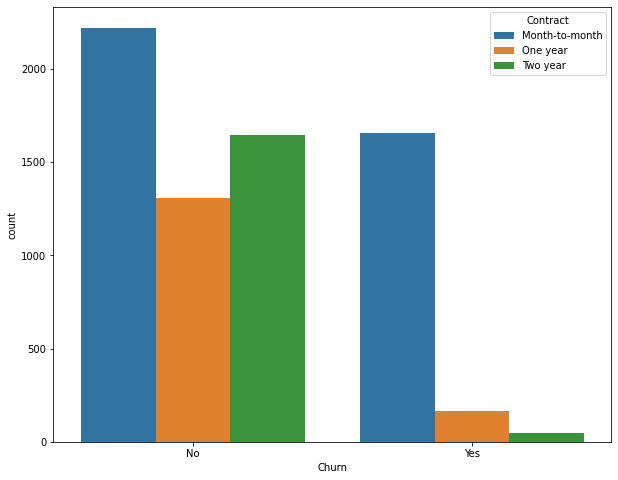

In [17]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data,hue="Contract")

In [18]:
print(f'A customer with month-to-month contract has a probability of {round(data[(data["Contract"] == "Month-to-month") & (data["Churn"] == "Yes")].count()[0] / data[(data["Contract"] == "Month-to-month")].count()[0] *100,2)} % churn')

print(f'A customer with one year contract has a probability of {round(data[(data["Contract"] == "One year") & (data["Churn"] == "Yes")].count()[0] / data[(data["Contract"] == "One year")].count()[0]*100,2)} % churn')

print(f'A customer with two year contract has a probability of {round(data[(data["Contract"] == "Two year") & (data["Churn"] == "Yes")].count()[0] / data[(data["Contract"] == "Two year")].count()[0]*100,2)} % churn')

A customer with month-to-month contract has a probability of 42.71 % churn
A customer with one year contract has a probability of 11.27 % churn
A customer with two year contract has a probability of 2.83 % churn


About 43% of customer with Month-to-Month Contract opted to move out as compared to 11% of customrs with One Year Contract and 3% with Two Year Contract. A major percent of people who left the comapny had Month-to-Month Contract.

**Payment Method Distribution w.r.t Churn**

Text(0.5, 1.0, '% of Payment Method')

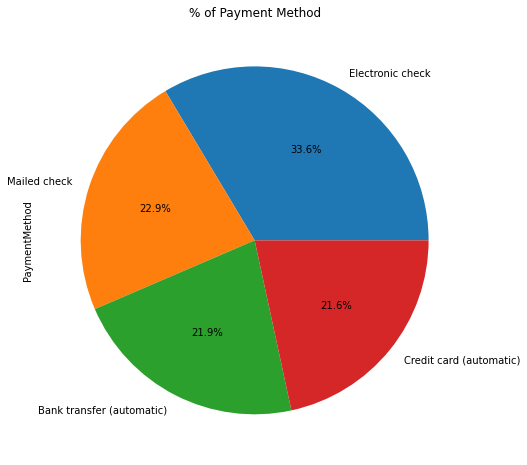

In [19]:
data['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Payment Method")

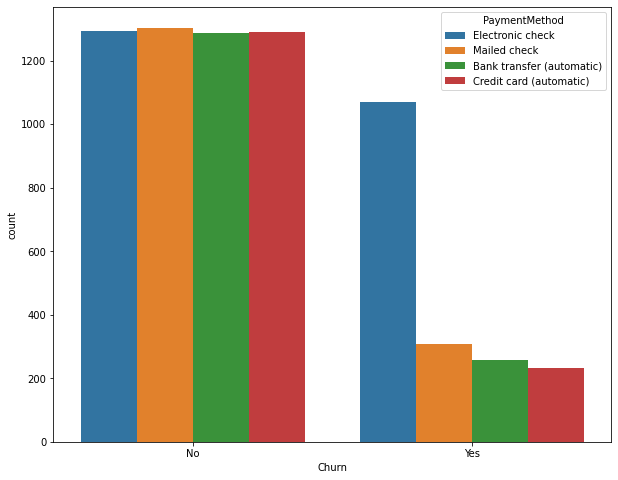

In [20]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data,hue="PaymentMethod")

Major customers who moved out had Electronic Check as Payment Method.

Customers who chose Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

**Churn Distribution w.r.t Internet Service**

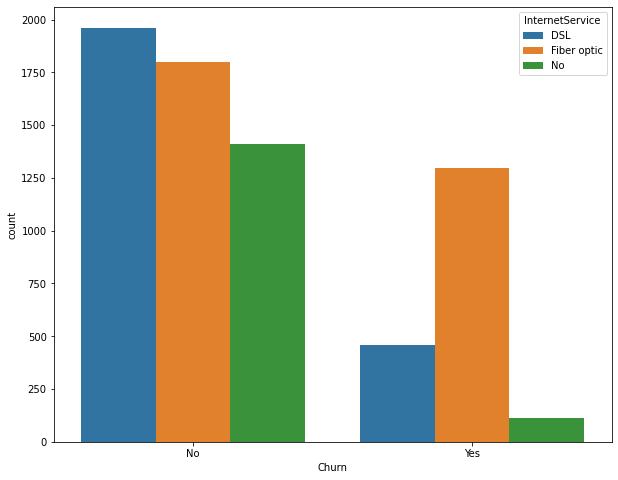

In [21]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data,hue=("InternetService"))

A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.

Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

**Dependents Distribution**

Text(0.5, 1.0, '% of Dependents')

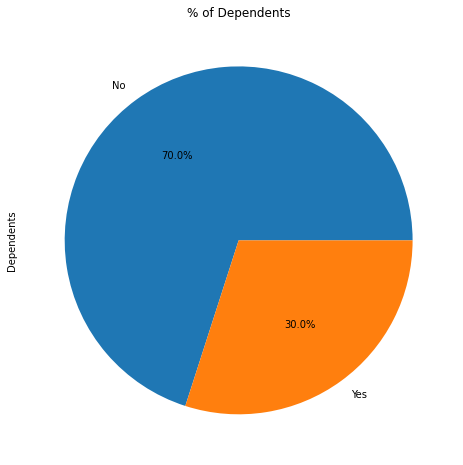

In [22]:
data['Dependents'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Dependents")

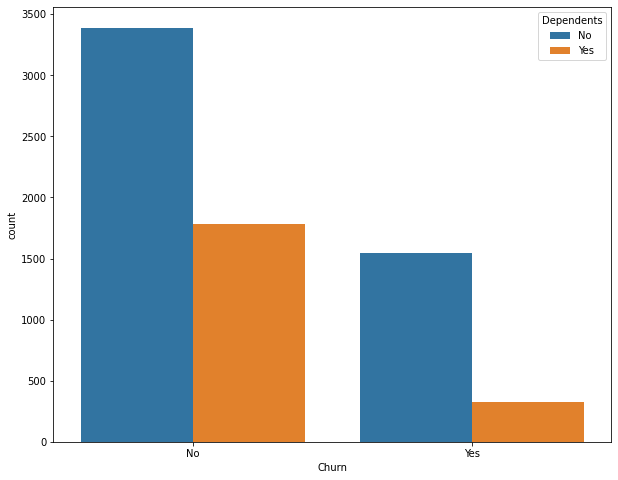

In [23]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data,hue=("Dependents"))

Customers without dependents are more likely to churn

**Partner Distribution**

Text(0.5, 1.0, '% of Partner')

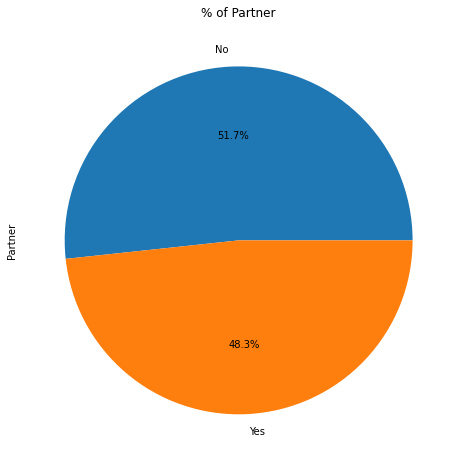

In [24]:
data['Partner'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Partner")


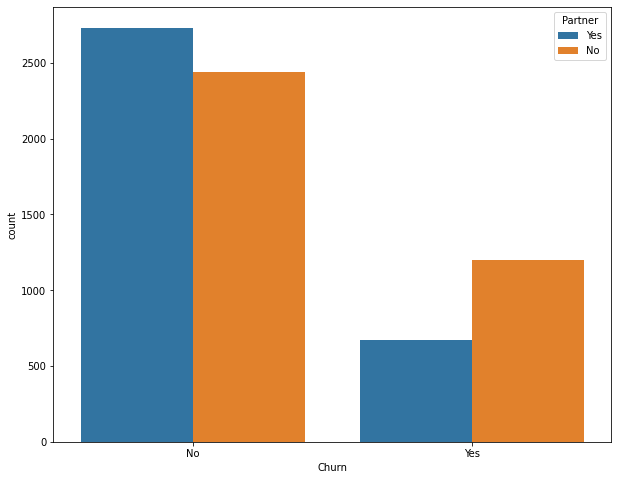

In [25]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data,hue=("Partner"))

Customers that doesn't have partners are more likely to churn.

**Senior Citizen Distributions**

Text(0.5, 1.0, '% of Senior Citizen')

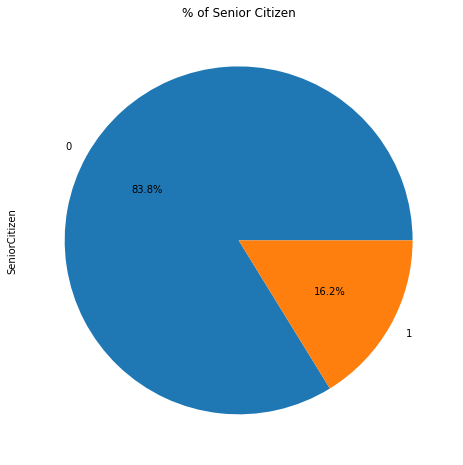

In [26]:
data['SeniorCitizen'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Senior Citizen")

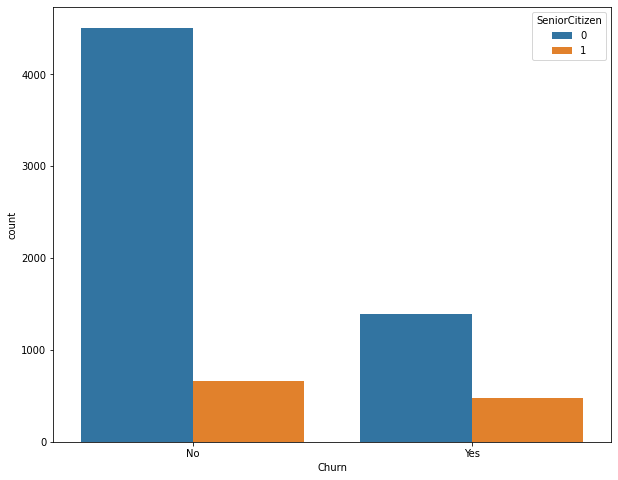

In [27]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data,hue=("SeniorCitizen"))

It can be observed that the there are vey few senior citizens who churns.

**Phone Service Distribution**

Text(0.5, 1.0, '% of PhoneService')

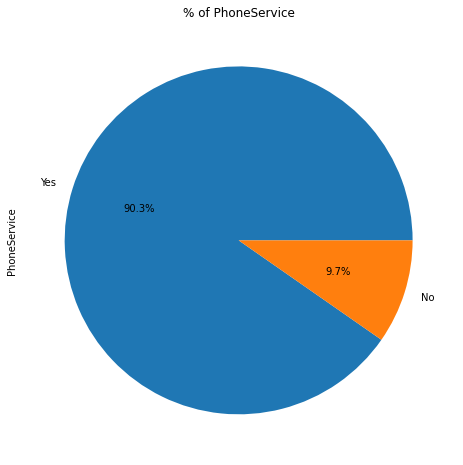

In [28]:
data['PhoneService'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of PhoneService")

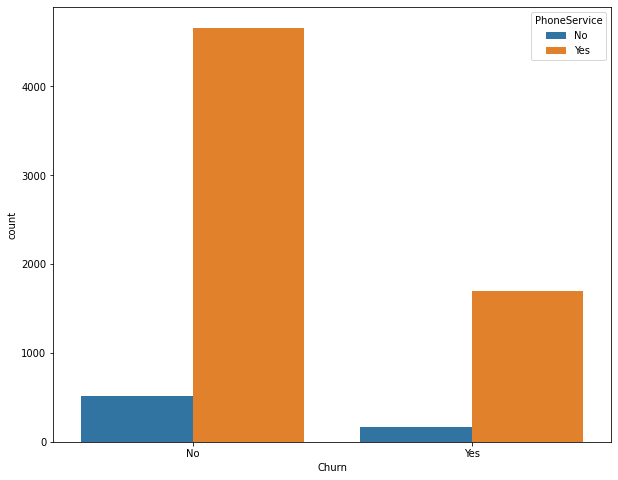

In [29]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data,hue=("PhoneService"))

Very small fraction of customers don't have a phone service.

**Outlier Detection**

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance, therefore we should see there are ouliers in the data.

In [30]:
data=data.drop(labels=['customerID'],axis=1)

In [31]:
num_data=data.select_dtypes(include=['float64','int64']).columns

In [32]:
num_data=num_data.drop('SeniorCitizen')

Text(0.5, 0.98, 'Box Plot of continuous variables')

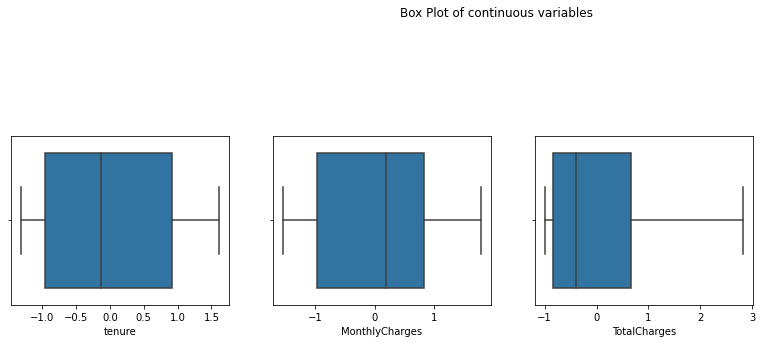

In [68]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(num_data):
    plt.rcParams['axes.facecolor'] = 'White'
    ax = plt.subplot(5,4, i+1)
    sns.boxplot(data=data, x=col)
plt.suptitle('Box Plot of continuous variables')

There is no outlier.

In [34]:
#data['Churn'] = pd.to_numeric(data['Churn'],errors = 'coerce')
#data.dtypes

In [35]:
#data['Churn'] = data['Churn'].fillna(0)

In [36]:
data['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

##Categorical Variables Encoding##

We use Target guided ordinal encoding. Ordering the categories according to the target means assigning a number to the category, but this numbering, this ordering, is informed by the mean of the target within the category. Briefly, we calculate the mean of the target for each label/category, then we order the labels according to these mean from smallest to biggest, and we number them accordingly.

In [37]:
data['Churn'] = data['Churn'].map({'Yes':1,'No':0})

In [38]:
categorical = [var for var in data.columns if data[var].dtype=='O']

In [39]:
def category(df):
    for var in categorical:
        ordered_labels = df.groupby([var])['Churn'].mean().sort_values().index

        ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
        ordinal_label
        df[var] = df[var].map(ordinal_label)

category(data)

In [40]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,0,0,1,2,1,2,2,2,2,2,1,3,29.85,29.85,0
1,0,0,1,1,34,1,1,1,1,2,1,2,2,2,1,0,2,56.95,1889.50,0
2,0,0,1,1,2,1,1,1,1,1,2,2,2,2,2,1,2,53.85,108.15,1
3,0,0,1,1,45,0,0,1,1,2,1,1,2,2,1,0,1,42.30,1840.75,0
4,1,0,1,1,2,1,1,2,2,2,2,2,2,2,2,1,3,70.70,151.65,1


In [41]:
x= data.drop(['Churn'], axis = 1)
y = data['Churn']


##Feature Scaling##

In [42]:
ss = StandardScaler()

In [43]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,0,0,1,2,1,2,2,2,2,2,1,3,29.85,29.85,0
1,0,0,1,1,34,1,1,1,1,2,1,2,2,2,1,0,2,56.95,1889.50,0
2,0,0,1,1,2,1,1,1,1,1,2,2,2,2,2,1,2,53.85,108.15,1
3,0,0,1,1,45,0,0,1,1,2,1,1,2,2,1,0,1,42.30,1840.75,0
4,1,0,1,1,2,1,1,2,2,2,2,2,2,2,2,1,3,70.70,151.65,1


In [44]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
data[num_cols] = ss.fit_transform(data[num_cols])

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,-1.277445,0,0,1,2,1,2,2,2,2,2,1,3,-1.160323,-0.994971,0
1,0,0,1,1,0.066327,1,1,1,1,2,1,2,2,2,1,0,2,-0.259629,-0.173876,0
2,0,0,1,1,-1.236724,1,1,1,1,1,2,2,2,2,2,1,2,-0.362660,-0.960399,1
3,0,0,1,1,0.514251,0,0,1,1,2,1,1,2,2,1,0,1,-0.746535,-0.195400,0
4,1,0,1,1,-1.236724,1,1,2,2,2,2,2,2,2,2,1,3,0.197365,-0.941193,1


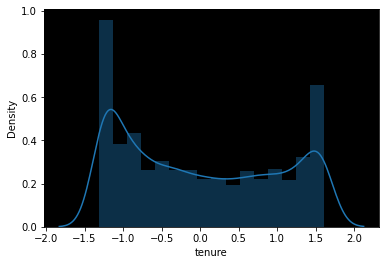

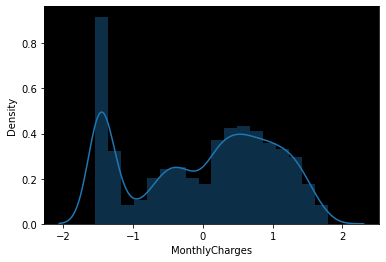

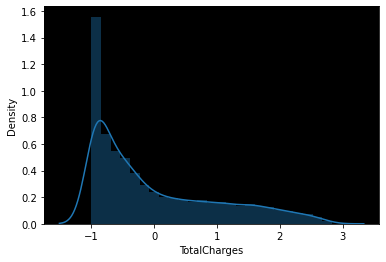

In [45]:
for i in num_cols:
    sns.distplot(data[i])
    plt.show()

##Dataset Splitting##

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape

((4930, 19), (2113, 19))

In [47]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1695,0,0,0,0,54,1,2,1,2,1,2,1,1,2,1,1,3,70.70,3770.00
1095,0,0,1,1,1,1,1,2,2,2,2,2,1,2,2,1,3,80.55,80.55
3889,0,0,1,1,13,1,1,0,0,0,0,0,0,0,1,0,0,19.30,259.65
3667,1,1,0,0,24,1,1,2,2,2,1,2,1,1,0,1,3,96.55,2263.45
2902,1,1,1,1,6,1,1,2,1,2,2,2,2,2,2,1,3,74.10,450.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,0,1,1,1,1,2,1,2,2,2,1,1,2,1,3,95.00,95.00
5191,1,0,0,0,23,1,2,1,1,1,1,1,1,1,0,1,0,91.10,2198.30
5226,0,0,0,0,12,1,1,0,0,0,0,0,0,0,2,1,3,21.15,306.05
5390,0,1,1,1,12,1,2,2,2,2,1,2,1,1,2,1,3,99.45,1200.15


In [48]:
y_train

1695    0
1095    0
3889    0
3667    0
2902    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 4930, dtype: int64

##Creating Machine Learning Models##

In [49]:
###Checking the Scores

def check_scores(model, x_train, x_test):
  # Making predictions on train and test data

  train_class_preds = model.predict(x_train)
  test_class_preds = model.predict(x_test)


  # Get the probabilities on train and test
  train_preds = model.predict_proba(x_train)[:,1]
  test_preds = model.predict_proba(x_test)[:,1]


  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()
    
   # Get the confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds )

  print('Train confusion matrix:')
  print( train_cm)
  print()
  print('Test confusion matrix:')
  print(test_cm)
  print()

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(y_train,train_preds)
  test_auc = roc_auc_score(y_test,test_preds)

  print('AUC on train data:', train_auc)
  print('AUC on test data:', test_auc)
  
  # Fscore, precision and recall on test data
  f1 = f1_score(y_test, test_class_preds)
  precision = precision_score(y_test, test_class_preds)
  recall = recall_score(y_test, test_class_preds)
  print("F1 score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)


  return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall

In [50]:
CV = KFold(n_splits=10, random_state=0, shuffle=True)

In [53]:
import scikitplot as skplot

##Model 1:Logistic Regression##

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.67      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



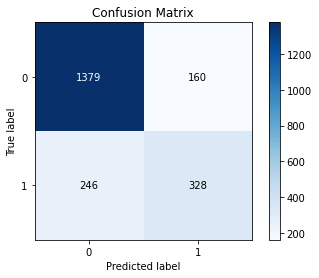

In [64]:
### LOGISTIC REGRESSION

log = LogisticRegression(solver = "liblinear")
log.fit(x_train, y_train)
y_pred_log = log.predict(x_test)
print(classification_report(y_test,y_pred_log))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_log)

In [65]:
lr_model, lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_f1, lr_precision, lr_recall= check_scores(log,x_train,x_test)

The accuracy on train dataset is 0.8030425963488844
The accuracy on test dataset is 0.8078561287269286

Train confusion matrix:
[[3269  366]
 [ 605  690]]

Test confusion matrix:
[[1379  160]
 [ 246  328]]

AUC on train data: 0.8418717636874445
AUC on test data: 0.8585069267568198
F1 score is: 0.6177024482109228
Precision is: 0.6721311475409836
Recall is: 0.5714285714285714


##Model 2: K-Nearest Neighbour##

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1539
           1       0.60      0.45      0.52       574

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113



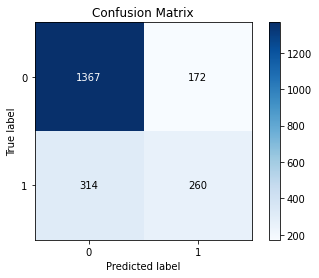

In [56]:
### KNN

knn = KNeighborsClassifier() ## n_neighbors is 5 by default
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(classification_report(y_test,y_pred_knn))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_knn)

In [57]:
knn_model, knn_train_auc, knn_test_auc, knn_train_accuracy, knn_test_accuracy,knn_f1, knn_precision,knn_recall= check_scores(knn,x_train,x_test)

The accuracy on train dataset is 0.8294117647058824
The accuracy on test dataset is 0.7699952673923331

Train confusion matrix:
[[3370  265]
 [ 576  719]]

Test confusion matrix:
[[1367  172]
 [ 314  260]]

AUC on train data: 0.8829518888115861
AUC on test data: 0.7516363175327658
F1 score is: 0.5168986083499005
Precision is: 0.6018518518518519
Recall is: 0.4529616724738676


##Decision Tree Classifier##

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1539
           1       0.51      0.49      0.50       574

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



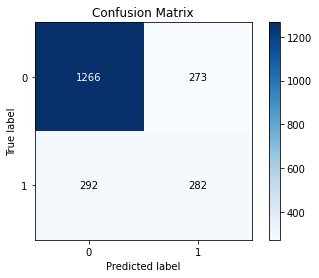

In [58]:
### DECISION TREE CLASSIFIER

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print(classification_report(y_test,y_pred_dt))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_dt)

In [59]:
DT_model, DT_train_auc, DT_test_auc, DT_train_accuracy, DT_test_accuracy,DT_f1, DT_precision,DT_recall= check_scores(dt,x_train,x_test)

The accuracy on train dataset is 0.9983772819472616
The accuracy on test dataset is 0.7326076668244202

Train confusion matrix:
[[3633    2]
 [   6 1289]]

Test confusion matrix:
[[1266  273]
 [ 292  282]]

AUC on train data: 0.9999927772142353
AUC on test data: 0.6566863183251715
F1 score is: 0.4995571302037201
Precision is: 0.5081081081081081
Recall is: 0.4912891986062718


##Random Forest##

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.67      0.48      0.56       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.78      0.80      0.78      2113



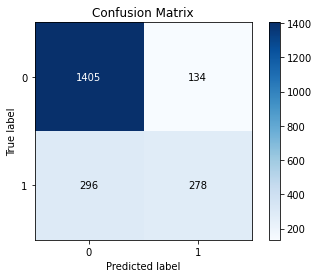

In [60]:
### RANDOM FOREST
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print(classification_report(y_test,y_pred_rf))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_rf)

In [61]:
rf_model, rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_f1, rf_precision,rf_recall= check_scores(rf,x_train,x_test)

The accuracy on train dataset is 0.9983772819472616
The accuracy on test dataset is 0.79649787032655

Train confusion matrix:
[[3631    4]
 [   4 1291]]

Test confusion matrix:
[[1405  134]
 [ 296  278]]

AUC on train data: 0.9999112022220689
AUC on test data: 0.8337176500419976
F1 score is: 0.563894523326572
Precision is: 0.6747572815533981
Recall is: 0.4843205574912892


##Feature Importance##

What features contribute more to predict the target (Churn)? let's find out how useful they are at predicting the target variable.

Random Forest algorithm offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

In [62]:
d = {'Features': x_train.columns, 'Feature Importance': rf.feature_importances_}
df = pd.DataFrame(d)
df_sorted = df.sort_values(by='Feature Importance', ascending = True)
df_sorted
df_sorted.style.background_gradient(cmap='Blues')

,Features,Feature Importance
5,PhoneService,0.004928
12,StreamingTV,0.018264
13,StreamingMovies,0.018765
1,SeniorCitizen,0.020632
3,Dependents,0.020717
10,DeviceProtection,0.023599
6,MultipleLines,0.024335
2,Partner,0.024631
15,PaperlessBilling,0.026119
9,OnlineBackup,0.026411


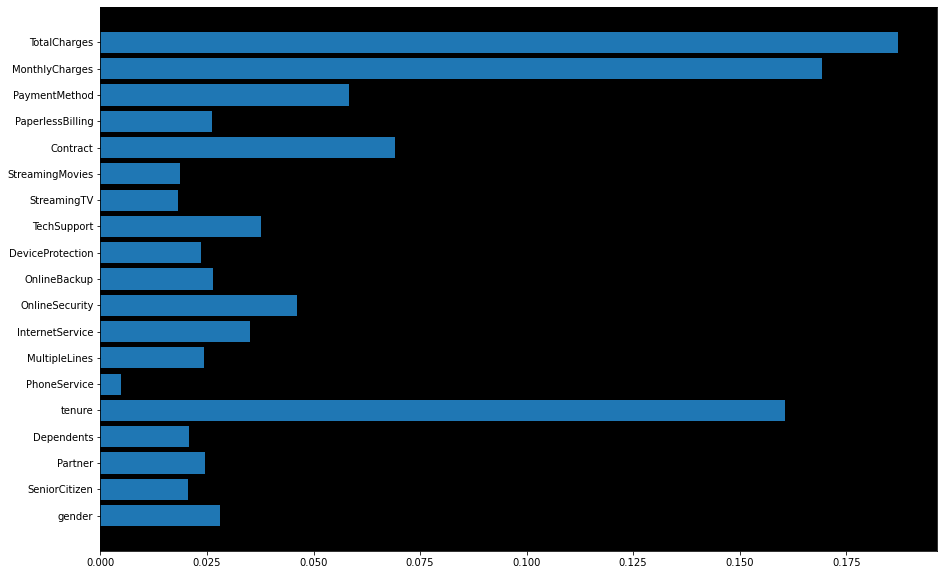

In [63]:
fig = plt.figure(figsize =(15, 10))
Feature= df['Features']
Feature_Importance= df['Feature Importance']
plt.barh(Feature,Feature_Importance)
 
# Show Plot
plt.show()

##Result##

In [66]:
#Making a dataframe of all the scores for every model
scores_ = [("Random Forest", rf_train_accuracy, rf_test_accuracy,rf_test_auc),
("Decision Tree",DT_train_accuracy,DT_test_accuracy,DT_test_auc),
("Logistic Regression", lr_train_accuracy, lr_test_accuracy,lr_test_auc),
('K Nearest Neighbour',knn_train_accuracy,knn_test_accuracy,knn_test_auc)]
Scores_ =pd.DataFrame(data = scores_, columns=['Model Name','Train Accuracy','Test Accuracy','Test Auc Score'])
Scores_.set_index('Model Name', inplace = True)

In [67]:
Scores_.style.background_gradient(cmap='YlGn')

,Train Accuracy,Test Accuracy,Test Auc Score
Model Name,,,
Random Forest,0.998377,0.796498,0.833718
Decision Tree,0.998377,0.732608,0.656686
Logistic Regression,0.803043,0.807856,0.858507
K Nearest Neighbour,0.829412,0.769995,0.751636
